Epoch 1/2


D:\Balance\College and Studies\TY\CV & DL Lab\Practice\test_venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.3981 - loss: 0.5711 - val_accuracy: 0.3000 - val_loss: 0.1789
Epoch 2/2
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4302 - loss: -0.1461 - val_accuracy: 0.3000 - val_loss: 0.1061
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3221 - loss: -0.2733 
Test Loss: 0.11, Test Accuracy: 0.30


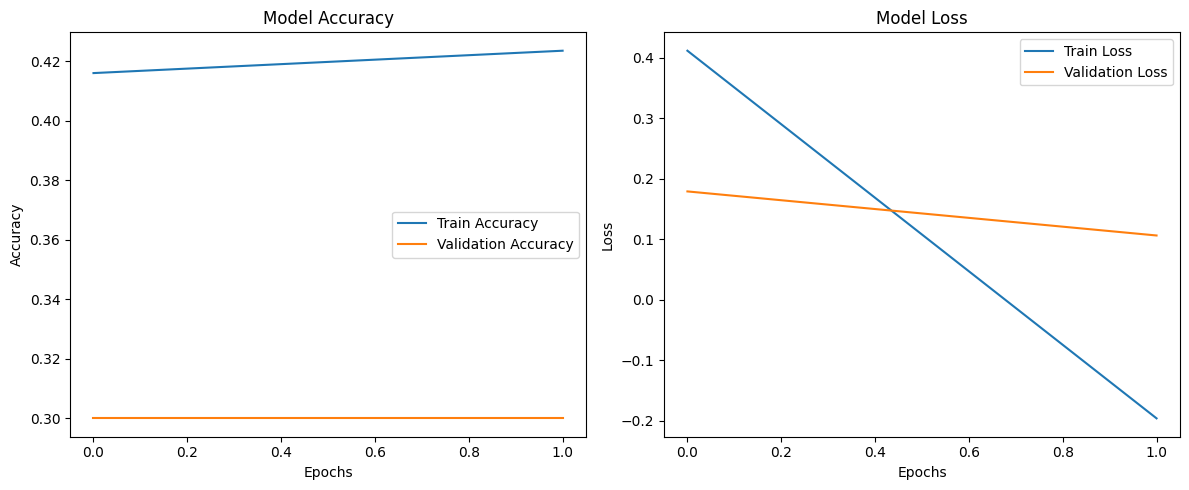

Enter a sentence to analyze sentiment:  wow


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
The sentiment of the input text is: Positive


In [2]:
# -*- coding: utf-8 -*-
"""sentiment analysis.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1y-JNJV5sngT8jzKE9wNMSV0mw0VD-rdx
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = r"D:\Balance\College and Studies\TY\CV & DL Lab\CVDL Dataset\sentiment_analysis.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Step 2: Clean and preprocess the dataset
# Keep only the text and sentiment columns, drop missing values
df = df[["text", "sentiment"]].dropna()

# Normalize sentiment labels (lowercase)
df["sentiment"] = df["sentiment"].str.lower()

# Encode labels (0 = negative, 1 = positive)
label_encoder = LabelEncoder()
df["sentiment"] = label_encoder.fit_transform(df["sentiment"])

# Split data into train and test sets
X = df["text"]
y = df["sentiment"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Tokenize and pad text data
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding="post")
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding="post")

# Step 4: Build the LSTM model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_length),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")  # Binary classification
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Step 5: Train the model
history = model.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test),
                    epochs=2, batch_size=32)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f"Test Loss: {loss:.2f}, Test Accuracy: {accuracy:.2f}")

# Step 7: Visualize training performance
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Step 8: Function to predict sentiment from user input
def predict_sentiment(text):
    # Clean and preprocess the user input
    text_seq = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_seq, maxlen=max_length, padding="post")

    # Predict sentiment
    prediction = model.predict(text_padded)

    # Decode prediction
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    return sentiment

# Step 9: Test with user input
user_input = input("Enter a sentence to analyze sentiment: ")
sentiment = predict_sentiment(user_input)
print(f"The sentiment of the input text is: {sentiment}")

